In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist= keras.datasets.mnist

In [4]:
(x_train , y_train) , (x_test , y_test )= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

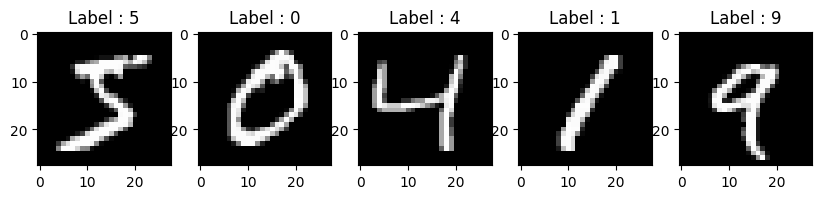

In [9]:
fig , axes =plt.subplots(1 ,5 , figsize =(10,2))
for i in range(5):
  axes[i].imshow(x_train[i] , cmap = 'gray')
  axes[i].set_title(f'Label : {y_train[i]}')
plt.show()

### Normalization


In [10]:
x_train , x_test = x_train/255 , x_test/255

In [11]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
# 4D tensor ( n of images , height , width , n of channals)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

In [15]:
model = keras.Sequential([

    # 1st Convolution layer (conv layer + booling layer)

    keras.layers.Conv2D(32 , (3,3) ,activation= 'relu' , input_shape =(28,28,1)),
    keras.layers.MaxPooling2D(2,2),

    # 2nd Convolution layer (conv layer + booling layer)

    keras.layers.Conv2D(64 , (3,3) ,activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    # Flatten

    keras.layers.Flatten(),

    # Fully connected layer (Dense)

    keras.layers.Dense(128 , activation= 'relu'),
    keras.layers.Dropout(0.5),

    # Output layer
    keras.layers.Dense(10 , activation= 'softmax')

])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile Model
model.compile(optimizer = 'adam' , loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [17]:
# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor= 'val_loss' , patience=5)

In [18]:
# Fiiting
history = model.fit(x_train , y_train , epochs= 50 , batch_size = 32 , validation_data=(x_test , y_test) , callbacks= [early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8610 - loss: 0.4270 - val_accuracy: 0.9843 - val_loss: 0.0474
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9766 - loss: 0.0788 - val_accuracy: 0.9894 - val_loss: 0.0323
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0554 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0445 - val_accuracy: 0.9910 - val_loss: 0.0250
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9888 - loss: 0.0351 - val_accuracy: 0.9907 - val_loss: 0.0288
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9900 - loss: 0.0311 - val_accuracy: 0.9927 - val_loss: 0.0218
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9926 - val_loss: 0.0244
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0252 -

In [19]:
test_loss ,test_acc=model.evaluate(x_test , y_test)
print(f"test loss : {test_loss : .4f} , test accuracy : {test_acc : .2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0317
test loss :  0.0255 , test accuracy :  0.99


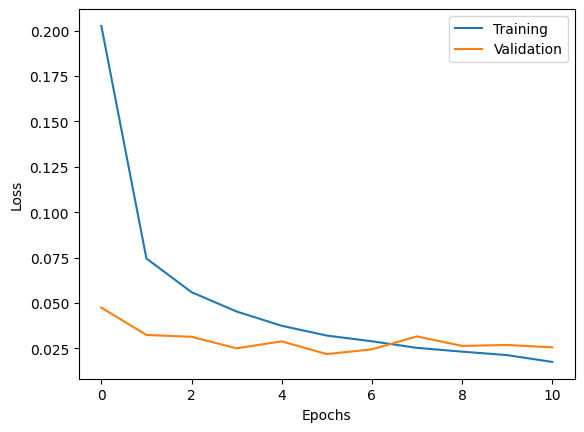

In [20]:
plt.plot(history.history["loss"] , label = 'Training')
plt.plot(history.history["val_loss"] , label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Making Predictions**

In [23]:
prediction = model.predict(x_test)
predicted_label = np.argmax(prediction , axis=1)
print('Predected Label :' , predected_label[:10])
print('True Label :' , y_test[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predected Label : [7 2 1 0 4 1 4 9 5 9]
True Label : [7 2 1 0 4 1 4 9 5 9]


### Visualizing Model Predictions**

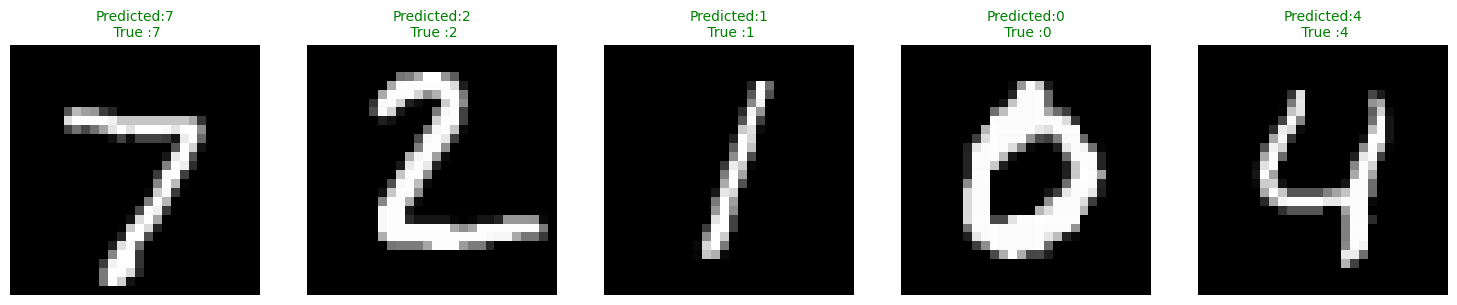

In [27]:
num_images = 5

plt.figure(figsize=(15, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    true_label = y_test[i]
    predicted = predicted_label[i]

    color = "green" if predicted == true_label else "red"

    plt.title(f"Predicted:{predicted}\n True :{true_label}", color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [28]:
plt.savefig("results.png")

<Figure size 640x480 with 0 Axes>